In [1]:
import pyarrow.parquet as pq
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from nixtlats import TimeGPT
%matplotlib inline

In [2]:
agg_monthly = pq.read_table('data/agg_monthly.parquet').to_pandas()

In [3]:
agg_monthly.head()

,RegionID,year,month,avg_temperature,max_temperature,min_temperature,avg_sunshine_duration,max_sunshine_duration,min_sunshine_duration,avg_precipitation,avg_rain,avg_snowfall,count_record,avg_humidity,avg_wind_speed,avg_soil_temperature,avg_soil_moisture
0,1000,1949,1,20.893548,22.9,17.4,36360.254516,46592.96,114.22,5.119355,5.119355,0.0,31,83.374497,8.215034,19.860537,0.455046
1,1000,1949,2,20.239286,23.5,15.0,39061.164286,45490.35,5610.33,2.839286,2.839286,0.0,28,80.038690,7.975744,19.858333,0.418362
2,1000,1949,3,20.719355,22.7,18.6,30877.352581,40876.61,0.00,5.893548,5.893548,0.0,31,85.978495,7.284409,20.569624,0.444293
3,1000,1949,4,15.953333,19.4,12.8,33343.093333,39559.54,0.00,2.126667,2.126667,0.0,30,82.226389,7.459028,17.799167,0.467942
4,1000,1949,5,13.887097,21.9,7.0,23280.035161,36306.69,0.00,5.925806,5.925806,0.0,31,85.336022,8.177823,15.398253,0.465198


In [4]:
# Filter weather data where RegionID is 1520
weather = agg_monthly[agg_monthly['RegionID'] == 1520]
weather.shape

(888, 17)

In [9]:
# Print max time
print(weather['year'].max(), weather['month'].max())

2022 12


In [10]:
# Add timestamp column
weather['timestamp'] = pd.to_datetime(weather[['year', 'month']].assign(DAY=1))

C:\Users\bbbbb\AppData\Local\Temp\ipykernel_22240\3955383304.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather['timestamp'] = pd.to_datetime(weather[['year', 'month']].assign(DAY=1))


In [11]:
weather.head()

,RegionID,year,month,avg_temperature,max_temperature,min_temperature,avg_sunshine_duration,max_sunshine_duration,min_sunshine_duration,avg_precipitation,avg_rain,avg_snowfall,count_record,avg_humidity,avg_wind_speed,avg_soil_temperature,avg_soil_moisture,timestamp
411144,1520,1949,1,3.058065,7.2,-1.3,24031.996774,32854.35,54.68,1.222581,0.974194,0.173871,31,83.569128,7.811141,5.034228,0.301046,1949-01-01
411145,1520,1949,2,2.785714,7.2,-4.2,30048.815714,36193.29,0.00,1.042857,0.739286,0.212500,28,78.319940,7.024554,3.420685,0.318763,1949-02-01
411146,1520,1949,3,1.854839,7.0,-8.2,31644.616452,41571.07,0.00,3.109677,1.074194,1.424839,31,82.634409,7.197177,4.249194,0.338781,1949-03-01
411147,1520,1949,4,10.566667,16.8,3.4,42628.802333,45957.86,35776.96,0.580000,0.566667,0.009333,30,71.390278,6.808611,7.653333,0.349911,1949-04-01
411148,1520,1949,5,14.006452,19.5,10.5,40633.204839,49845.26,6390.19,1.687097,1.687097,0.000000,31,75.993280,6.196371,11.798387,0.295974,1949-05-01


In [13]:
time_gpt = TimeGPT(
    token='YOUR_TOKEN'
)

In [6]:
time_gpt.validate_token()

INFO:nixtlats.timegpt:Happy Forecasting! :), If you have questions or need support, please email ops@nixtla.io


True

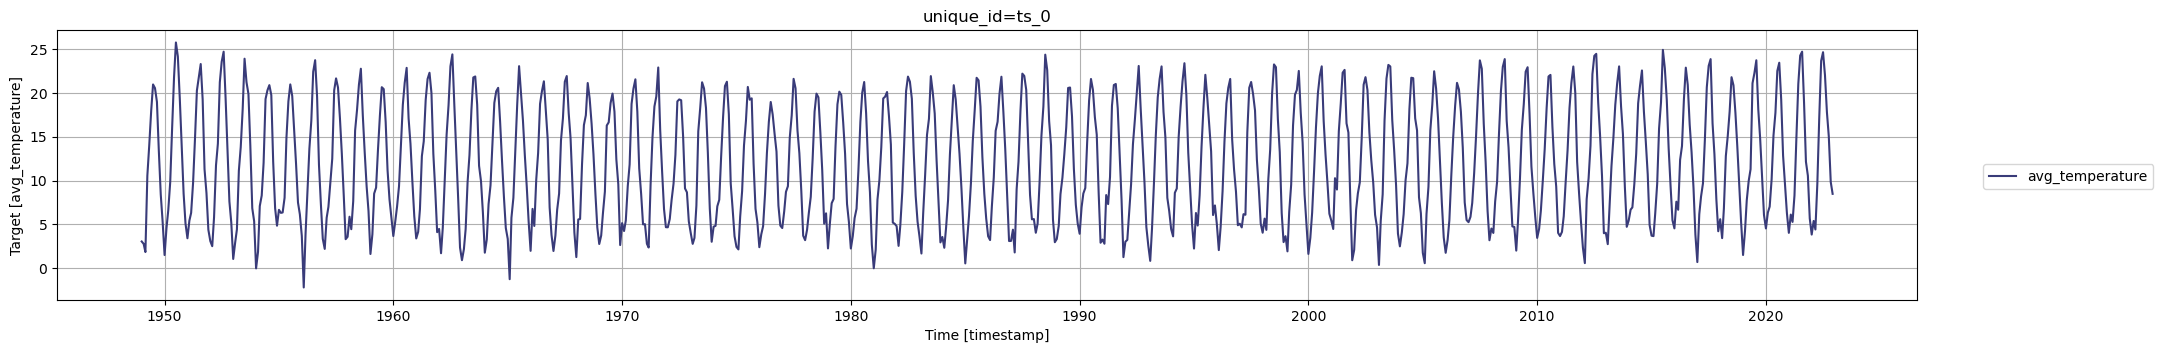

In [15]:
# Plot the time series
time_gpt.plot(weather, time_col='timestamp', target_col='avg_temperature')

In [17]:
target_col = weather.columns.to_list()
target_col.remove('RegionID')
target_col.remove('year')
target_col.remove('month')
target_col.remove('min_temperature')
target_col.remove('max_temperature')
target_col.remove('min_sunshine_duration')
target_col.remove('max_sunshine_duration')
target_col.remove('count_record')
target_col

['avg_temperature',
 'avg_sunshine_duration',
 'avg_precipitation',
 'avg_rain',
 'avg_snowfall',
 'avg_humidity',
 'avg_wind_speed',
 'avg_soil_temperature',
 'avg_soil_moisture',
 'timestamp']

## Forecast

In [19]:
forecast_df = time_gpt.forecast(weather, h=12, time_col='timestamp', target_col=target_col[0], freq='MS')

INFO:nixtlats.timegpt:Validating inputs...
INFO:nixtlats.timegpt:Preprocessing dataframes...
INFO:nixtlats.timegpt:Calling Forecast Endpoint...


In [22]:
sunshine_forecast = time_gpt.forecast(weather, h=12, time_col='timestamp', target_col=target_col[1], freq='MS')
precipitation_forecast = time_gpt.forecast(weather, h=12, time_col='timestamp', target_col=target_col[2], freq='MS')
rain_forecast = time_gpt.forecast(weather, h=12, time_col='timestamp', target_col=target_col[3], freq='MS')
snowfall_forecast = time_gpt.forecast(weather, h=12, time_col='timestamp', target_col=target_col[4], freq='MS')
humidity_forecast = time_gpt.forecast(weather, h=12, time_col='timestamp', target_col=target_col[5], freq='MS')
wind_speed_forecast = time_gpt.forecast(weather, h=12, time_col='timestamp', target_col=target_col[6], freq='MS')

INFO:nixtlats.timegpt:Validating inputs...
INFO:nixtlats.timegpt:Preprocessing dataframes...
INFO:nixtlats.timegpt:Calling Forecast Endpoint...
INFO:nixtlats.timegpt:Validating inputs...
INFO:nixtlats.timegpt:Preprocessing dataframes...
INFO:nixtlats.timegpt:Calling Forecast Endpoint...
INFO:nixtlats.timegpt:Validating inputs...
INFO:nixtlats.timegpt:Preprocessing dataframes...
INFO:nixtlats.timegpt:Calling Forecast Endpoint...
INFO:nixtlats.timegpt:Validating inputs...
INFO:nixtlats.timegpt:Preprocessing dataframes...
INFO:nixtlats.timegpt:Calling Forecast Endpoint...
INFO:nixtlats.timegpt:Validating inputs...
INFO:nixtlats.timegpt:Preprocessing dataframes...
INFO:nixtlats.timegpt:Calling Forecast Endpoint...
INFO:nixtlats.timegpt:Validating inputs...
INFO:nixtlats.timegpt:Preprocessing dataframes...
INFO:nixtlats.timegpt:Calling Forecast Endpoint...
INFO:nixtlats.timegpt:Validating inputs...
INFO:nixtlats.timegpt:Preprocessing dataframes...


ApiError: status_code: 429, body: {'data': None, 'message': 'Too many requests', 'details': 'You have reached your request limit, email ops@nixtla.io to increase your usage limit or wait until the next minute', 'code': None, 'requestID': 'AVX8SWU628', 'support': 'If you have questions or need support, please email ops@nixtla.io'}

In [23]:
soil_temperature_forecast = time_gpt.forecast(weather, h=12, time_col='timestamp', target_col=target_col[7], freq='MS')
soil_moisture_forecast = time_gpt.forecast(weather, h=12, time_col='timestamp', target_col=target_col[8], freq='MS')

INFO:nixtlats.timegpt:Validating inputs...
INFO:nixtlats.timegpt:Preprocessing dataframes...
INFO:nixtlats.timegpt:Calling Forecast Endpoint...
INFO:nixtlats.timegpt:Validating inputs...
INFO:nixtlats.timegpt:Preprocessing dataframes...
INFO:nixtlats.timegpt:Calling Forecast Endpoint...


In [20]:
forecast_df

,timestamp,TimeGPT
0,2023-01-01,6.633043
1,2023-02-01,7.675667
2,2023-03-01,7.747555
3,2023-04-01,11.612829
4,2023-05-01,18.360170
5,2023-06-01,24.828249
6,2023-07-01,27.376486
7,2023-08-01,25.889158
8,2023-09-01,21.267801
9,2023-10-01,16.525967


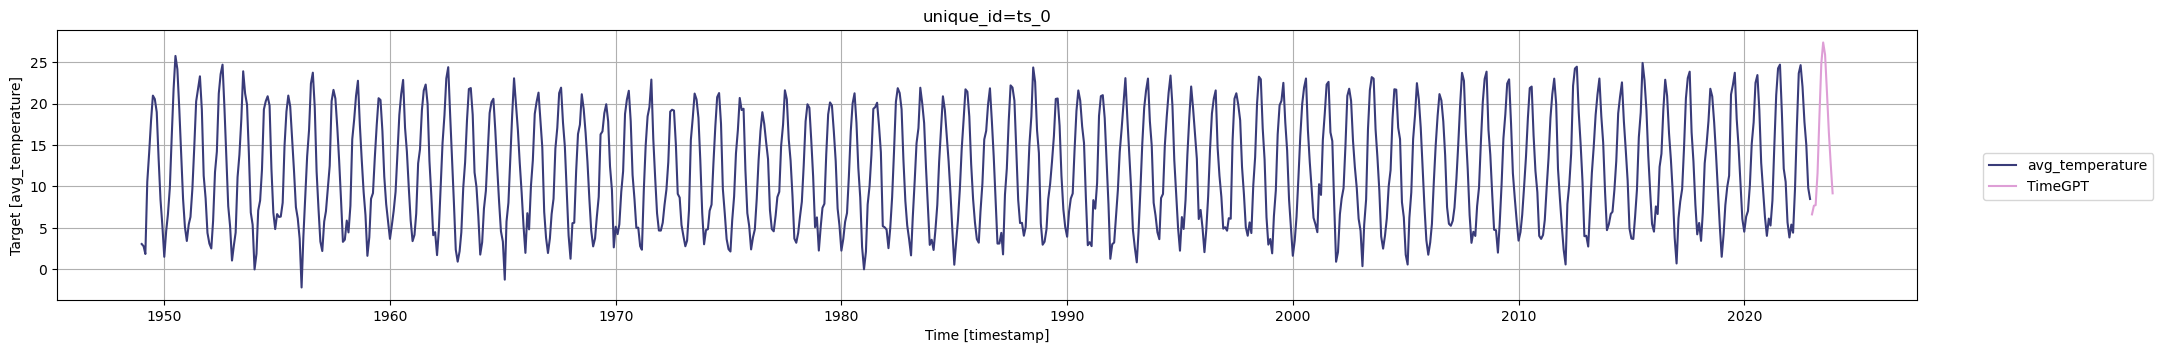

In [21]:
# Plot the forecast
time_gpt.plot(weather, forecast_df, time_col='timestamp', target_col=target_col[0])

## Turn weather data into list of numpy arrays

In [31]:
batch_vintage = 2023
rating_year = 2024

In [32]:
list_avg_temperature = forecast_df['TimeGPT'].to_list()
list_avg_sunshine_duration = sunshine_forecast['TimeGPT'].to_list()
list_avg_precipitation = precipitation_forecast['TimeGPT'].to_list()
list_avg_rain = rain_forecast['TimeGPT'].to_list()
list_avg_snowfall = snowfall_forecast['TimeGPT'].to_list()
list_avg_humidity = humidity_forecast['TimeGPT'].to_list()
list_avg_wind_speed = wind_speed_forecast['TimeGPT'].to_list()
list_avg_soil_temperature = soil_temperature_forecast['TimeGPT'].to_list()
list_avg_soil_moisture = soil_moisture_forecast['TimeGPT'].to_list()

In [33]:
length = len(list_avg_temperature)
length

12

In [34]:
list_delta_time_rating = [rating_year - batch_vintage] * length

## Normalize data

In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [36]:
list_delta_time_rating = scaler.fit_transform(np.array(list_delta_time_rating).reshape(-1, 1))
list_avg_temperature = scaler.fit_transform(np.array(list_avg_temperature).reshape(-1, 1))
list_avg_sunshine_duration = scaler.fit_transform(np.array(list_avg_sunshine_duration).reshape(-1, 1))
list_avg_precipitation = scaler.fit_transform(np.array(list_avg_precipitation).reshape(-1, 1))
list_avg_rain = scaler.fit_transform(np.array(list_avg_rain).reshape(-1, 1))
list_avg_snowfall = scaler.fit_transform(np.array(list_avg_snowfall).reshape(-1, 1))
list_avg_humidity = scaler.fit_transform(np.array(list_avg_humidity).reshape(-1, 1))
list_avg_wind_speed = scaler.fit_transform(np.array(list_avg_wind_speed).reshape(-1, 1))
list_avg_soil_temperature = scaler.fit_transform(np.array(list_avg_soil_temperature).reshape(-1, 1))
list_avg_soil_moisture = scaler.fit_transform(np.array(list_avg_soil_moisture).reshape(-1, 1))

In [39]:
list_delta_time_rating

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [40]:
list_all = []
for i in range(0, length, 12):
    new_array = np.array([np.array(list_avg_temperature[i:i + 12]),np.array(list_avg_sunshine_duration[i:i + 12]),
                         np.array(list_avg_precipitation[i:i + 12]),np.array(list_avg_rain[i:i + 12]),
                         np.array(list_avg_snowfall[i:i + 12]),np.array(list_avg_humidity[i:i + 12]),
                         np.array(list_avg_wind_speed[i:i + 12]),np.array(list_avg_soil_temperature[i:i + 12]),
                         np.array(list_avg_soil_moisture[i:i + 12])])
    list_all.append((new_array, list_delta_time_rating[i]))

## Input data for TensorFlow model

In [41]:
time_series_input = np.array([element[0] for element in list_all])
time_series_input = time_series_input.reshape(time_series_input.shape[0], time_series_input.shape[1], time_series_input.shape[2], 1)
delta_time_input = np.array([element[1] for element in list_all])

In [29]:
# Import model from saved file
from tensorflow.keras.models import load_model
model = load_model('model/cnn_model.h5')
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 time_series_input (InputLa  [(None, 9, 12, 1)]           0         []                            
 yer)                                                                                             
                                                                                                  
 conv2d (Conv2D)             (None, 7, 10, 32)            320       ['time_series_input[0][0]']   
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 3, 5, 32)             0         ['conv2d[0][0]']              
 D)                                                                                               
                                                                                              

In [42]:
# Predict the time series
predictions = model.predict([time_series_input, delta_time_input])
predictions

1/1 [==============================] - 0s 59ms/step


array([[3.2563436]], dtype=float32)

**Do not make sense yet. This means all wines produced in 2023 will have the same rating in 2024.**